# Clustering phase

In [621]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, normalize,StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import seaborn as sb

from matplotlib.patches import Patch

In [622]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [623]:
df_compteur=pd.read_csv('/content/drive/MyDrive/Smart_grid/Data_clustering.csv')
df_compteur.set_index('Compteur', inplace=True)# we need to set the meter id as the index
df_compteur

,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,...,moyenne_conso_total_lundi_janiver_2012,moyenne_conso_total_dimanche_janiver_2012,conso_tot_Periode1,conso_tot_Periode2,conso_tot_Periode3,conso_tot_Periode4,conso_tot_Autumn,conso_tot_Spring,conso_tot_Summer,conso_tot_Winter
Compteur,,,,,,,,,,,,,,,,,,,,,
MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,0.334494,...,26.7176,23.8682,2135.735000,3226.863999,4777.285002,5276.784998,3348.389000,3529.738999,2911.795,5626.746001
MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,0.250059,...,12.1218,12.6734,1001.084999,2410.819000,2461.081000,2676.650999,1928.677000,1939.635000,1895.634,2785.689999
MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,0.127554,...,4.3520,6.4034,602.827000,1229.880000,1118.330999,1068.116000,974.748000,811.601000,928.005,1304.800000
MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,0.247210,...,13.0752,10.7276,1373.879000,2383.354000,3341.051999,2503.208000,2152.115999,2160.867000,1801.026,3487.483999
MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,0.164223,...,10.0634,11.8376,1345.039000,1583.273000,2403.249999,3081.486000,1728.842000,1941.119000,1903.827,2839.259998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,0.155282,...,0.0000,0.0000,396.681000,1419.894999,1764.877000,1932.332001,1297.483000,1150.544000,1074.719,1991.039000
MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,0.096543,...,0.0000,0.0000,640.686000,882.788000,969.215000,1729.709000,1112.151000,927.330000,813.390,1369.527000
MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,0.068028,...,0.0000,0.0000,384.144000,621.643000,443.158000,936.920000,586.944000,554.402000,535.981,708.538000


In [624]:
# Standardize data
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df_compteur) 
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(scaled_df, columns=[df_compteur.columns]) 


In [625]:
normalized_df.describe()

,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,...,moyenne_conso_total_lundi_janiver_2012,moyenne_conso_total_dimanche_janiver_2012,conso_tot_Periode1,conso_tot_Periode2,conso_tot_Periode3,conso_tot_Periode4,conso_tot_Autumn,conso_tot_Spring,conso_tot_Summer,conso_tot_Winter
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,0.078017,0.151538,0.234880,0.168657,0.184363,0.124539,0.124384,0.105867,0.082327,0.151202,...,0.122602,0.106292,0.074406,0.138289,0.146166,0.222753,0.182963,0.145032,0.195345,0.162608
std,0.151817,0.108411,0.163742,0.151522,0.127729,0.098918,0.178056,0.153800,0.117397,0.111762,...,0.176918,0.154384,0.113021,0.104274,0.113320,0.152721,0.130102,0.117239,0.125404,0.135773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.080903,0.124078,0.072178,0.098017,0.059113,0.000000,0.000000,0.029400,0.074694,...,0.000000,0.000000,0.024244,0.067681,0.073254,0.111722,0.098496,0.067458,0.111650,0.075344
50%,0.000000,0.119348,0.187222,0.130871,0.148195,0.095916,0.045738,0.040293,0.047767,0.120072,...,0.043128,0.040460,0.043079,0.112245,0.115819,0.181825,0.152105,0.111802,0.169628,0.123660
75%,0.105615,0.197436,0.306649,0.213474,0.237885,0.163553,0.188486,0.164843,0.079824,0.189983,...,0.181988,0.165527,0.073237,0.178670,0.185839,0.294164,0.238422,0.185917,0.248343,0.198820
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's check for outliers and remove them using IsolationForest

In [626]:
'''model = IsolationForest(contamination='auto')

# Fit the model to the data
model.fit(normalized_df)

# Use the model to predict which data points are outliers
outlier_predictions = model.predict(normalized_df)

# Identify the outlier data points
outliers = normalized_df[outlier_predictions == -1]

# Delete the outlier data points from the dataset
filtered_data = normalized_df[outlier_predictions != -1]
filtered_data.reset_index(inplace=True, drop=True)'''

"model = IsolationForest(contamination='auto')\n\n# Fit the model to the data\nmodel.fit(normalized_df)\n\n# Use the model to predict which data points are outliers\noutlier_predictions = model.predict(normalized_df)\n\n# Identify the outlier data points\noutliers = normalized_df[outlier_predictions == -1]\n\n# Delete the outlier data points from the dataset\nfiltered_data = normalized_df[outlier_predictions != -1]\nfiltered_data.reset_index(inplace=True, drop=True)"

In [627]:
'''import scipy.stats as stats
from scipy.stats import shapiro
from termcolor import colored



def grubbs_test(x, feature):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    if g_critical > g_calculated: 
       
        outlier_presence = False
    else:
          
        outlier_presence = True
        
   
    return outlier_presence
    
outliers_features = []
for col in filtered_data.columns: 
    if grubbs_test(filtered_data[col], col):
        outliers_features.append(col)
'''

'import scipy.stats as stats\nfrom scipy.stats import shapiro\nfrom termcolor import colored\n\n\n\ndef grubbs_test(x, feature):\n    n = len(x)\n    mean_x = np.mean(x)\n    sd_x = np.std(x)\n    numerator = max(abs(x-mean_x))\n    g_calculated = numerator/sd_x\n    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)\n    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))\n    if g_critical > g_calculated: \n       \n        outlier_presence = False\n    else:\n          \n        outlier_presence = True\n        \n   \n    return outlier_presence\n    \noutliers_features = []\nfor col in filtered_data.columns: \n    if grubbs_test(filtered_data[col], col):\n        outliers_features.append(col)\n'

In [628]:
'''filtered_data = filtered_data.drop(columns=outliers_features)
filtered_data'''

'filtered_data = filtered_data.drop(columns=outliers_features)\nfiltered_data'

In [629]:
filtered_data=normalized_df

## K-means

In [630]:
colum=[]
l=[i for i in filtered_data.columns]
def convertTuple(tup):
    str = ''
    for item in tup:
        str = str + item
    return str
for i in l:
  str = convertTuple(i)
  colum.append(str)
filtered_data.columns=colum

In [631]:
filtered_data

,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,...,moyenne_conso_total_lundi_janiver_2012,moyenne_conso_total_dimanche_janiver_2012,conso_tot_Periode1,conso_tot_Periode2,conso_tot_Periode3,conso_tot_Periode4,conso_tot_Autumn,conso_tot_Spring,conso_tot_Summer,conso_tot_Winter
0,0.494060,0.299260,0.424481,0.334900,0.348591,0.290834,0.634445,0.480548,0.115435,0.257087,...,0.634445,0.482543,0.117943,0.271667,0.383141,0.520490,0.355134,0.324459,0.420018,0.370654
1,0.357452,0.165686,0.240179,0.153325,0.195025,0.160854,0.287848,0.255159,0.053098,0.191539,...,0.287848,0.256218,0.054482,0.202456,0.196268,0.262674,0.204557,0.178294,0.273439,0.183496
2,0.105325,0.076321,0.108631,0.112910,0.089036,0.074127,0.103344,0.128922,0.031176,0.096437,...,0.103344,0.129457,0.032207,0.102297,0.087933,0.103180,0.103383,0.074604,0.133861,0.085941
3,0.256786,0.172061,0.280320,0.247062,0.214706,0.167410,0.310488,0.215983,0.073619,0.189327,...,0.310488,0.216880,0.075332,0.200127,0.267265,0.245477,0.228256,0.198630,0.259792,0.229728
4,0.157381,0.157162,0.243203,0.195865,0.191051,0.152605,0.238969,0.238331,0.072032,0.124903,...,0.238969,0.239320,0.073719,0.132269,0.191602,0.302816,0.183363,0.178431,0.274621,0.187025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.000000,0.083347,0.188161,0.195256,0.124632,0.083345,0.000000,0.000000,0.021005,0.117962,...,0.000000,0.000000,0.020677,0.118413,0.140097,0.188871,0.137612,0.105760,0.155025,0.131148
444,0.000000,0.076137,0.136208,0.106723,0.099791,0.074656,0.000000,0.000000,0.035157,0.072362,...,0.000000,0.000000,0.034325,0.072859,0.075902,0.168780,0.117956,0.085242,0.117329,0.090205
445,0.000000,0.049444,0.068394,0.058243,0.056894,0.048288,0.000000,0.000000,0.020307,0.050226,...,0.000000,0.000000,0.019976,0.050710,0.033459,0.090172,0.062252,0.050962,0.077313,0.046662
446,0.000000,0.109574,0.168642,0.136394,0.132833,0.111030,0.000000,0.000000,0.037629,0.108760,...,0.000000,0.000000,0.036654,0.109135,0.105218,0.220902,0.137633,0.122432,0.158923,0.121819


We need to determin the best k for our case

Elbow Method

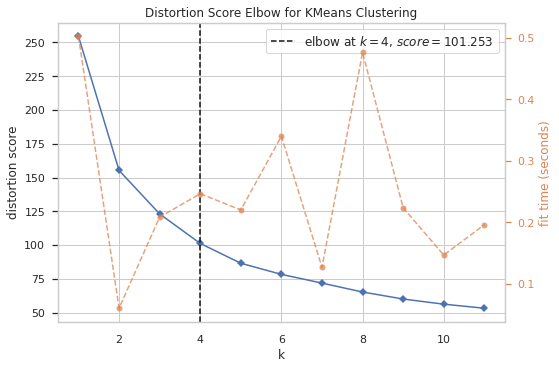

In [632]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(filtered_data)        # Fit the data to the visualizer
visualizer.show() 

The chosen k is 2, let's visualize it


In [633]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(filtered_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

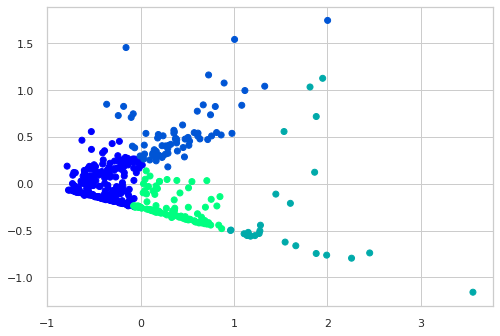

In [634]:

plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [635]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(filtered_data)
label=kmeans.predict(filtered_data)

In [636]:
data_clustered=filtered_data.copy(deep=True)
data_clustered['label']=label

In [637]:
cluster1=data_clustered[data_clustered['label']==0]
cluster2=data_clustered[data_clustered['label']==1]
cluster3=data_clustered[data_clustered['label']==2]
cluster4=data_clustered[data_clustered['label']==3]


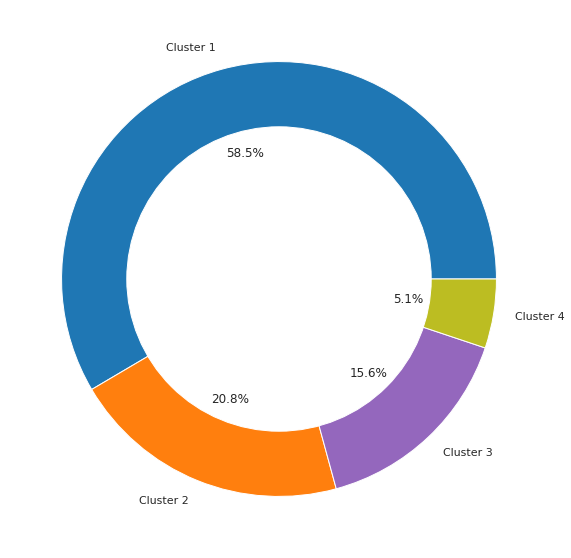

In [638]:
per_class =data_clustered.iloc[:,-1].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Dendrograms

In [639]:
X = df_compteur.values
names = df_compteur.index
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

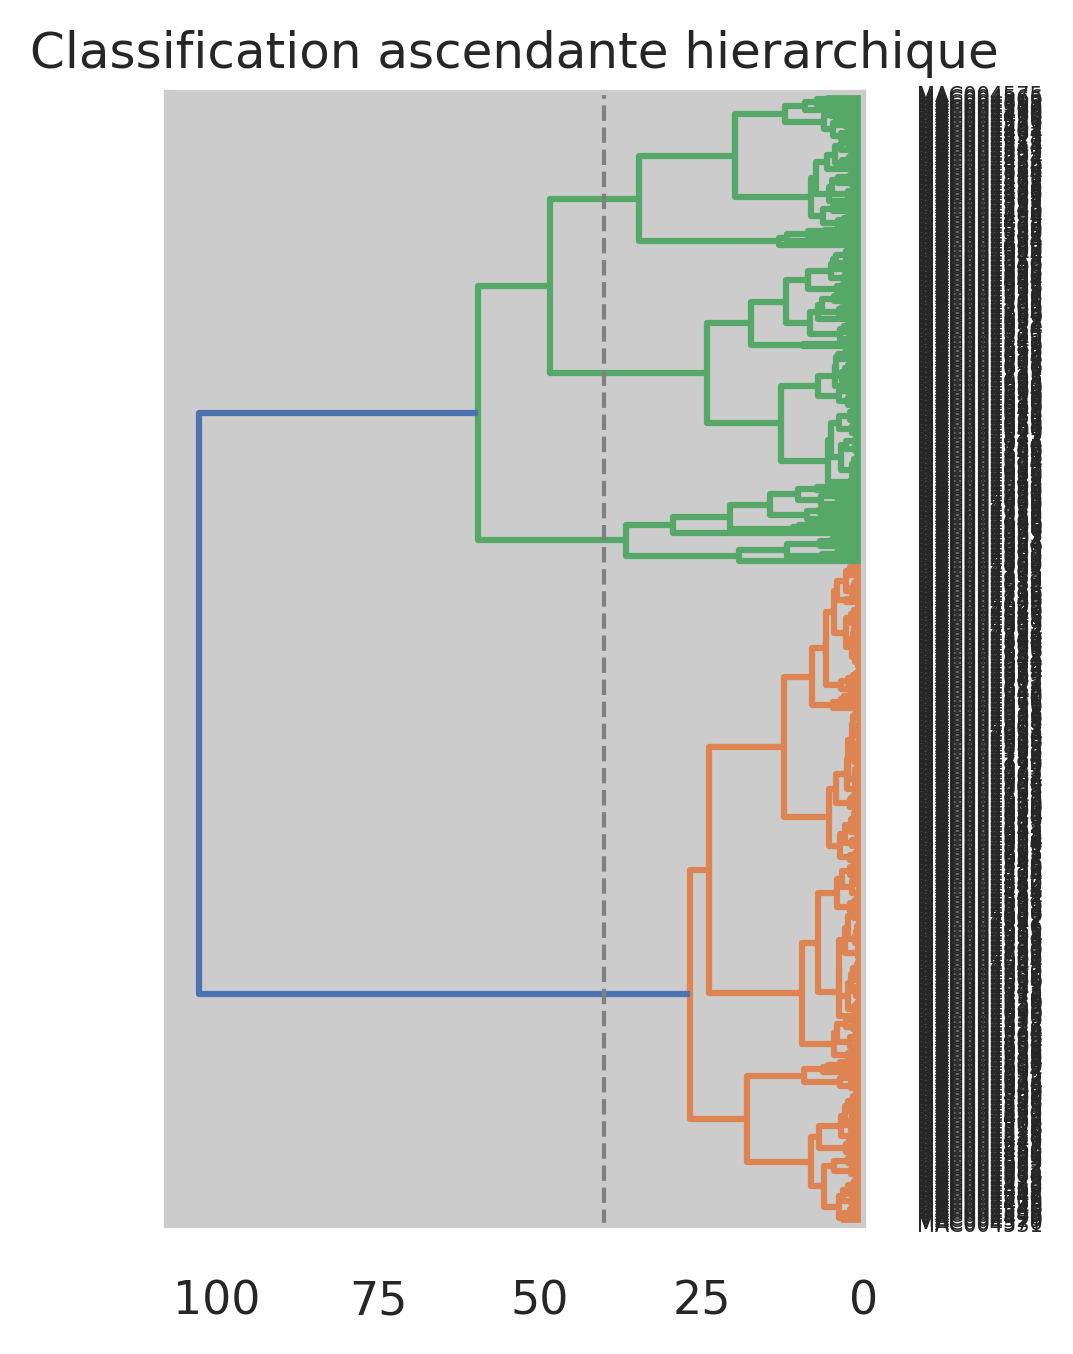

In [640]:
Z = linkage(X_scaled, 'ward')

fig = plt.figure(figsize=(3,5))
fig.set_dpi(300)
dendrogram(Z, orientation="left",labels=df_compteur.index)
plt.axvline(x=40, c='grey', lw=1, linestyle='dashed')
plt.title('Classification ascendante hierarchique')
plt.show()

The line that intercepts the longest distance The best K for our case is 2

## Interpretation

In [641]:
data_clustered.columns

Index(['consommation_moyenne_2011', 'consommation_moyenne_2012',
       'consommation_moyenne_2013', 'consommation_moyenne_2014',
       'consommation_moyenne_par_an', 'moyenne_consommation_par_mois',
       'moyenne_conso_lundi_janiver_2012',
       'moyenne_conso_dimanche_janiver_2012', 'conso_moy_Periode1',
       'conso_moy_Periode2', 'conso_moy_Periode3', 'conso_moy_Periode4',
       'conso_moy_Autumn', 'conso_moy_Spring', 'conso_moy_Summer',
       'conso_moy_Winter', 'consommation_total_2011',
       'consommation_total_2012', 'consommation_total_2013',
       'consommation_total_2014', 'moyenne_de_consommation_total_par_an',
       'moyenne_total_consommation_par_mois',
       'moyenne_conso_total_lundi_janiver_2012',
       'moyenne_conso_total_dimanche_janiver_2012', 'conso_tot_Periode1',
       'conso_tot_Periode2', 'conso_tot_Periode3', 'conso_tot_Periode4',
       'conso_tot_Autumn', 'conso_tot_Spring', 'conso_tot_Summer',
       'conso_tot_Winter', 'label'],
      dtype='

### Average consumption per year

In [642]:
means_cons_year = data_clustered.groupby('label')['consommation_moyenne_par_an'].mean()
means_cons_year

label
0    0.545014
1    0.276898
2    0.232741
3    0.106931
Name: consommation_moyenne_par_an, dtype: float64

Text(0.5, 1.0, 'Consommation moyenne par an par cluster')

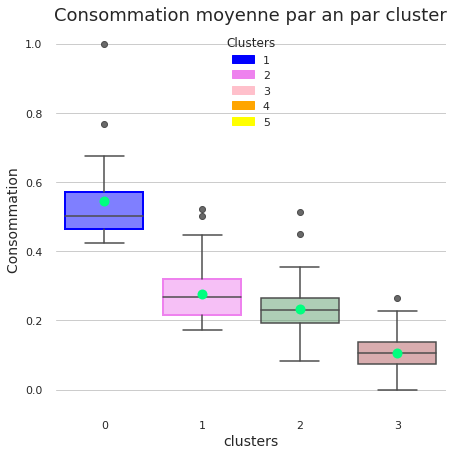

In [643]:
fig, ax = plt.subplots(figsize=(7, 7))


sb.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sb.boxplot(x='label', y='consommation_moyenne_par_an',data=data_clustered,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Consommation ", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)


# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Consommation moyenne par an par cluster", size=18)

-- Cluster 1 a une consommation moyenne par année plus elevé que le cluster 1

### Average consumption per month

In [644]:
means_cons_year = data_clustered.groupby('label')['moyenne_consommation_par_mois'].mean()
means_cons_year

label
0    0.381117
1    0.176081
2    0.177060
3    0.069686
Name: moyenne_consommation_par_mois, dtype: float64

Text(0.5, 1.0, 'Consommation moyenne par mois par cluster')

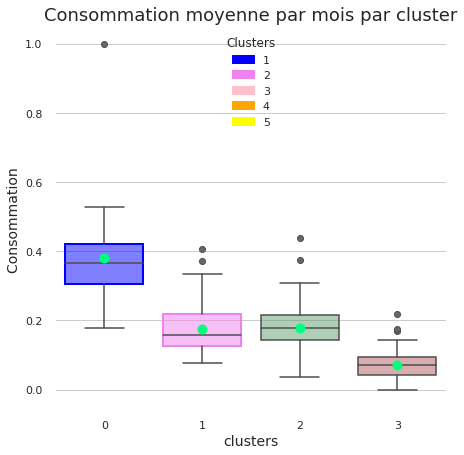

In [645]:
fig, ax = plt.subplots(figsize=(7, 7))


sb.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sb.boxplot(x='label', y='moyenne_consommation_par_mois',data=data_clustered,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Consommation ", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)


# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Consommation moyenne par mois par cluster", size=18)

### Average consumption in spring

In [646]:
means_cons_year = data_clustered.groupby('label')['conso_moy_Spring'].mean()
means_cons_year

label
0    0.527259
1    0.254442
2    0.218606
3    0.096956
Name: conso_moy_Spring, dtype: float64

Text(0.5, 1.0, 'Consommation moyenne en printemps par cluster')

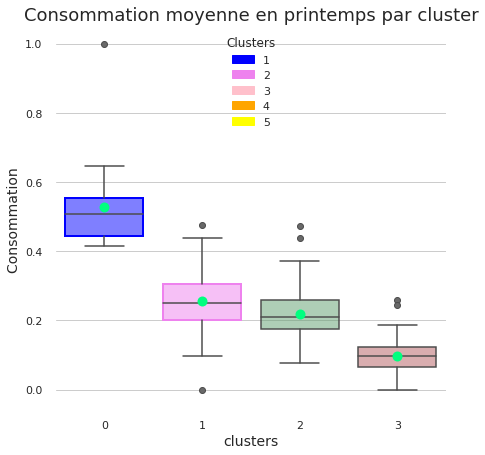

In [647]:
fig, ax = plt.subplots(figsize=(7, 7))


sb.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sb.boxplot(x='label', y='conso_moy_Spring',data=data_clustered,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Consommation ", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)


# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Consommation moyenne en printemps par cluster", size=18)

### Average consumption per Autumn

In [648]:
means_cons_month = data_clustered.groupby('label')['conso_moy_Autumn'].mean()
means_cons_month

label
0    0.547476
1    0.291931
2    0.233031
3    0.112193
Name: conso_moy_Autumn, dtype: float64

Text(0.5, 1.0, 'Consommation moyenne pour le saison automne par cluster')

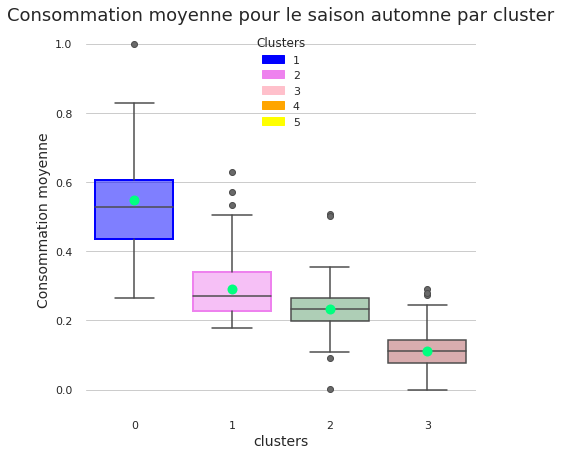

In [649]:
fig, ax = plt.subplots(figsize=(7, 7))


sb.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sb.boxplot(x='label', y='conso_moy_Autumn',data=data_clustered,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Consommation moyenne ", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)


# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Consommation moyenne pour le saison automne par cluster", size=18)

### Average consumption in period 2 of the day

Text(0.5, 1.0, 'Consommation moyenne pour la deuxième periode du jour par cluster')

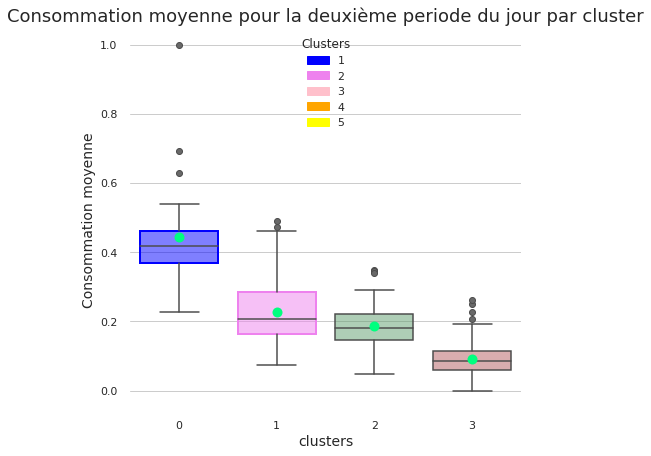

In [650]:
fig, ax = plt.subplots(figsize=(7, 7))


sb.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sb.boxplot(x='label', y='conso_moy_Periode2',data=data_clustered,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Consommation moyenne ", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)


# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Consommation moyenne pour la deuxième periode du jour par cluster", size=18)


### Average consumption in period 1 of the day

Text(0.5, 1.0, 'Consommation moyenne pour la première periode du jour par cluster')

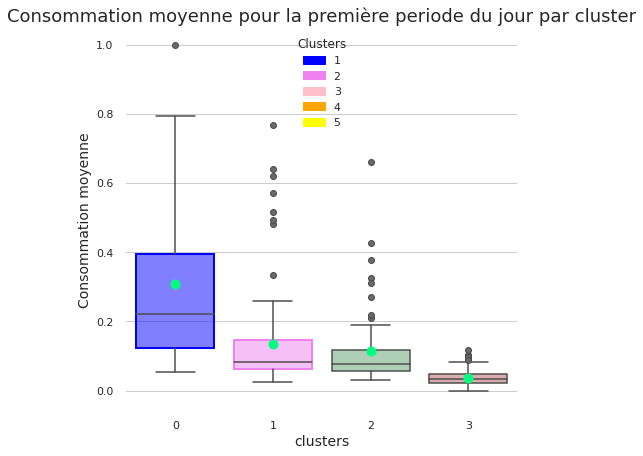

In [651]:
fig, ax = plt.subplots(figsize=(7, 7))


sb.set_theme(style="whitegrid")

legend_elements = [Patch(facecolor='blue', edgecolor='blue',label='1'),Patch(facecolor='violet', edgecolor='violet',label='2'),Patch(facecolor='pink', edgecolor='pink',label='3'),Patch(facecolor='orange', edgecolor='orange',label='4'),Patch(facecolor='yellow', edgecolor='yellow',label='5')]

ax = sb.boxplot(x='label', y='conso_moy_Periode1',data=data_clustered,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})
plt.ylabel("Consommation moyenne ", size=14)

mybox = ax.artists[0]
mybox.set_facecolor('blue'), mybox.set_edgecolor('blue'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('violet'), mybox.set_edgecolor('violet'), mybox.set_linewidth(2)


# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(handles=legend_elements, loc='upper center',title="Clusters")
plt.xlabel("clusters", size=14)
plt.title("Consommation moyenne pour la première periode du jour par cluster", size=18)


Based on these visualisations, we can notice that cluster 3 represents the industrial consumers and the other clusters represents the residential consumers